## **The start of analysis with all empty values substituted for mean**

In [11]:
## Import Libraries and Suppress Warnings
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import MinMaxScaler

# Suppress warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [12]:
## Load and Display the Data
try:
    dataCo2 = pd.read_csv('CO2.csv')
    dataCo2 = pd.DataFrame(dataCo2)
except FileNotFoundError:
    print("data can't be found")

print(dataCo2)  # to see the basic structure of the data


           Country ISO 3166-1 alpha-3  UN M49  Year         Total  \
0      Afghanistan                AFG       4  1750           NaN   
1      Afghanistan                AFG       4  1751           NaN   
2      Afghanistan                AFG       4  1752           NaN   
3      Afghanistan                AFG       4  1753           NaN   
4      Afghanistan                AFG       4  1754           NaN   
...            ...                ...     ...   ...           ...   
61420       Global                WLD     756  2018  36766.912297   
61421       Global                WLD     756  2019  37039.881946   
61422       Global                WLD     756  2020  35007.822458   
61423       Global                WLD     756  2021  36815.680623   
61424       Global                WLD     756  2022  37150.949699   

               Coal           Oil          Gas       Cement     Flaring  \
0               NaN           NaN          NaN     0.000000         NaN   
1               NaN  

In [13]:
## Normalize Data
copy = dataCo2.drop(["Country", "ISO 3166-1 alpha-3", "Year"], axis=1)

# Don’t want to normalize year so it may be used later
normalizer = MinMaxScaler()
normalizedCo2 = normalizer.fit_transform(copy)
normalizedData = pd.DataFrame(normalizedCo2, columns=copy.columns)
print(normalizedData)

         UN M49     Total      Coal       Oil       Gas    Cement   Flaring  \
0      0.000000       NaN       NaN       NaN       NaN  0.000000       NaN   
1      0.000000       NaN       NaN       NaN       NaN  0.000000       NaN   
2      0.000000       NaN       NaN       NaN       NaN  0.000000       NaN   
3      0.000000       NaN       NaN       NaN       NaN  0.000000       NaN   
4      0.000000       NaN       NaN       NaN       NaN  0.000000       NaN   
...         ...       ...       ...       ...       ...       ...       ...   
61420  0.394544  0.989663  0.967309  0.991105  0.946421  0.925183  0.935395   
61421  0.394544  0.997010  0.964617  1.000000  0.962031  0.954715  1.000000   
61422  0.394544  0.942313  0.934507  0.880585  0.953711  0.964947  0.915242   
61423  0.394544  0.990975  0.984210  0.930190  1.000000  1.000000  0.926517   
61424  0.394544  1.000000  1.000000  0.959527  0.977899  0.948614  0.912789   

          Other  Per Capita  
0           NaN      

In [14]:
## Select Numerical Data and Impute Missing Values with Mean
data = dataCo2.select_dtypes(include=[np.number, "float"]).columns.to_list()
selected_data = dataCo2[data]

# Imputation with mean
imputed_dataframe = selected_data.fillna(selected_data.mean())
print(imputed_dataframe)


       UN M49  Year         Total          Coal           Oil          Gas  \
0           4  1750    153.057634     71.425477     56.566270    24.080376   
1           4  1751    153.057634     71.425477     56.566270    24.080376   
2           4  1752    153.057634     71.425477     56.566270    24.080376   
3           4  1753    153.057634     71.425477     56.566270    24.080376   
4           4  1754    153.057634     71.425477     56.566270    24.080376   
...       ...   ...           ...           ...           ...          ...   
61420     756  2018  36766.912297  14725.249126  12267.151230  7498.324347   
61421     756  2019  37039.881946  14684.277641  12377.248495  7621.995402   
61422     756  2020  35007.822458  14225.918061  10899.216217  7556.077650   
61423     756  2021  36815.680623  14982.537322  11513.189924  7922.817236   
61424     756  2022  37150.949699  15222.908123  11876.300292  7747.715288   

            Cement     Flaring       Other  Per Capita  
0     

In [19]:
## Combine Imputed Data with Original Non-Numerical Columns
Mean_dataset = pd.concat([dataCo2["Country"], dataCo2["ISO 3166-1 alpha-3"], dataCo2["Year"], imputed_dataframe], axis=1)
# Add back Country, ISO code and Year to the dataset again.
Mean_dataset = Mean_dataset.rename({"ISO 3166-1 alpha-3": "ISO Code", "Total": "Total Co2 Emission (Mt)", "Per Capita": "Per Capita (t)"}, axis=1)
Mean_dataset = Mean_dataset.dropna()
print("Number of NaN values per column\n", Mean_dataset.isna().sum())  # Check for NaN values.
print(Mean_dataset)



Number of NaN values per column
 Country                    0
ISO Code                   0
Year                       0
UN M49                     0
Year                       0
Total Co2 Emission (Mt)    0
Coal                       0
Oil                        0
Gas                        0
Cement                     0
Flaring                    0
Other                      0
Per Capita (t)             0
dtype: int64
           Country ISO Code  Year  UN M49  Year  Total Co2 Emission (Mt)  \
0      Afghanistan      AFG  1750       4  1750               153.057634   
1      Afghanistan      AFG  1751       4  1751               153.057634   
2      Afghanistan      AFG  1752       4  1752               153.057634   
3      Afghanistan      AFG  1753       4  1753               153.057634   
4      Afghanistan      AFG  1754       4  1754               153.057634   
...            ...      ...   ...     ...   ...                      ...   
61420       Global      WLD  2018     756  20

In [20]:
# Clean the 'Country' column
Mean_dataset['Country'] = Mean_dataset['Country'].str.strip()

# Ensure no concatenated or corrupted values in 'Country' column
def clean_country_names(country):
    if isinstance(country, str):
        return ''.join(filter(str.isalpha, country))
    return country

Mean_dataset['Country'] = Mean_dataset['Country'].apply(clean_country_names)

# Check for any unusual concatenations or anomalies in the 'Country' column
unique_countries = Mean_dataset['Country'].unique()
print("Unique countries:\n", unique_countries)



Unique countries:
 ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antarctica' 'AntiguaandBarbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'BonaireSaintEustatiusandSaba' 'BosniaandHerzegovina' 'Botswana' 'Brazil'
 'BritishVirginIslands' 'BruneiDarussalam' 'Bulgaria' 'BurkinaFaso'
 'Burundi' 'Cambodia' 'Canada' 'CapeVerde' 'CentralAfricanRepublic' 'Chad'
 'Chile' 'China' 'ChristmasIsland' 'Colombia' 'Comoros' 'Congo'
 'CookIslands' 'CostaRica' 'CôtedIvoire' 'Croatia' 'Cuba' 'Curaçao'
 'Cyprus' 'Czechia' 'NorthKorea' 'DemocraticRepublicoftheCongo' 'Denmark'
 'Djibouti' 'Dominica' 'DominicanRepublic' 'Ecuador' 'Egypt' 'ElSalvador'
 'EquatorialGuinea' 'Eritrea' 'Estonia' 'Ethiopia' 'FaeroeIslands'
 'MicronesiaFederatedStatesof' 'Fiji' 'Finland' 'PanamaCanalZone' 'France'
 'FrenchPolynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 '

In [21]:
# Drop the rows where the "Country" column is "Global"
drop_global = Mean_dataset[Mean_dataset["Country"] == "Global"].index
Mean_dataset_without_global = Mean_dataset.drop(drop_global)

# Check the resulting DataFrame
print("DataFrame after dropping 'Global':\n", Mean_dataset_without_global.head())

# Calculate and print mean, median, and std deviation after removing the "Global" rows
mean_values = Mean_dataset_without_global.drop(columns=['Year']).mean().round(3)
median_values = Mean_dataset_without_global.drop(columns=['Year']).median().round(3)
std_values = Mean_dataset_without_global.drop(columns=['Year']).std().round(3)

print("Mean values:\n", mean_values)
print("Median values:\n", median_values)
print("Standard deviation values:\n", std_values)


DataFrame after dropping 'Global':
        Country ISO Code  Year  UN M49  Year  Total Co2 Emission (Mt)  \
0  Afghanistan      AFG  1750       4  1750               153.057634   
1  Afghanistan      AFG  1751       4  1751               153.057634   
2  Afghanistan      AFG  1752       4  1752               153.057634   
3  Afghanistan      AFG  1753       4  1753               153.057634   
4  Afghanistan      AFG  1754       4  1754               153.057634   

        Coal       Oil        Gas  Cement   Flaring      Other  Per Capita (t)  
0  71.425477  56.56627  24.080376     0.0  1.789797  10.124879        4.763254  
1  71.425477  56.56627  24.080376     0.0  1.789797  10.124879        4.763254  
2  71.425477  56.56627  24.080376     0.0  1.789797  10.124879        4.763254  
3  71.425477  56.56627  24.080376     0.0  1.789797  10.124879        4.763254  
4  71.425477  56.56627  24.080376     0.0  1.789797  10.124879        4.763254  


TypeError: Could not convert ['AfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAfghanistanAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAlgeriaAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAndorraAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAngolaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAnguillaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntarcticaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaAntiguaandBarbudaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArgentinaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArmeniaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaArubaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustraliaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAustriaAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanAzerbaijanBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahamasBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBahrainBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBangladeshBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBarbadosBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelarusBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelgiumBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBelizeBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBeninBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBermudaBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBhutanBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBonaireSaintEustatiusandSabaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBosniaandHerzegovinaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBotswanaBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBrazilBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBritishVirginIslandsBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBruneiDarussalamBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBulgariaBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurkinaFasoBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiBurundiCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCambodiaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCanadaCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCapeVerdeCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicCentralAfricanRepublicChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChadChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChileChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChinaChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandChristmasIslandColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaColombiaComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosComorosCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCongoCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCookIslandsCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCostaRicaCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCôtedIvoireCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCroatiaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCubaCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCuraçaoCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCyprusCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaCzechiaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaNorthKoreaDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDemocraticRepublicoftheCongoDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDenmarkDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDjiboutiDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicaDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicDominicanRepublicEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEcuadorEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptEgyptElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorElSalvadorEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEquatorialGuineaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEritreaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEstoniaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaEthiopiaFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsFaeroeIslandsMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofMicronesiaFederatedStatesofFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFijiFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandFinlandPanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZonePanamaCanalZoneFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFranceFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaFrenchPolynesiaGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGabonGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGambiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGeorgiaGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGermanyGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGhanaGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreeceGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGreenlandGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGrenadaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuatemalaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuineaBissauGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaGuyanaHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHaitiHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHondurasHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHongKongHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryHungaryIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIcelandIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIndonesiaIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIraqIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIrelandIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIranIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelIsraelItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyItalyJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJamaicaJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJapanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKazakhstanKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKenyaKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKiribatiKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKosovoKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKuwaitKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanKyrgyzstanLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLaosLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLatviaLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLebanonLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLesothoLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLiberiaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLibyaLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLiechtensteinLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLithuaniaLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgLuxembourgMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoMacaoNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaNorthMacedoniaMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMadagascarMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalawiMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMalaysiaMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaldivesMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaliMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMarshallIslandsMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritaniaMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMauritiusMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMexicoMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMongoliaMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontenegroMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMontserratMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMoroccoMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMozambiqueMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarMyanmarNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNamibiaNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNauruNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNepalNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNetherlandsNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewCaledoniaNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNewZealandNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNicaraguaNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigerNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNigeriaNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNiueNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayNorwayStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineStateofPalestineOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanOmanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPakistanPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPalauPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPanamaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaPapuaNewGuineaParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayParaguayPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPeruPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesPhilippinesBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaBoliviaPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPolandPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalPortugalQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarQatarCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonCameroonSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaSouthKoreaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaMoldovaSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSouthSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanSudanRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRomaniaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRussiaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaRwandaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintHelenaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSaintLuciaSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSintMaartenDutchpartSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSamoaSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaoTomeandPrincipeSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSaudiArabiaSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSenegalSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSerbiaSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSeychellesSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSierraLeoneSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSingaporeSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSlovakiaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSloveniaSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSolomonIslandsSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSomaliaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSouthAfricaSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSpainSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSriLankaSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisSaintKittsandNevisStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaStKittsNevisAnguillaSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintPierreandMiquelonSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSaintVincentandtheGrenadinesSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameSurinameEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniEswatiniSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwedenSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSwitzerlandSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaSyriaTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTaiwanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanTajikistanThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandThailandTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTimorLesteTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTogoTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTongaTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTrinidadandTobagoTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTunisiaTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTürkiyeTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurkmenistanTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTurksandCaicosIslandsTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluTuvaluUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUgandaUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUkraineUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedArabEmiratesUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomUnitedKingdomTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaTanzaniaUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUruguayUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanUzbekistanVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVanuatuVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVenezuelaVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamVietNamWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsWallisandFutunaIslandsYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenYemenZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZambiaZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweZimbabweInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalShippingInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviationInternationalAviation'] to numeric

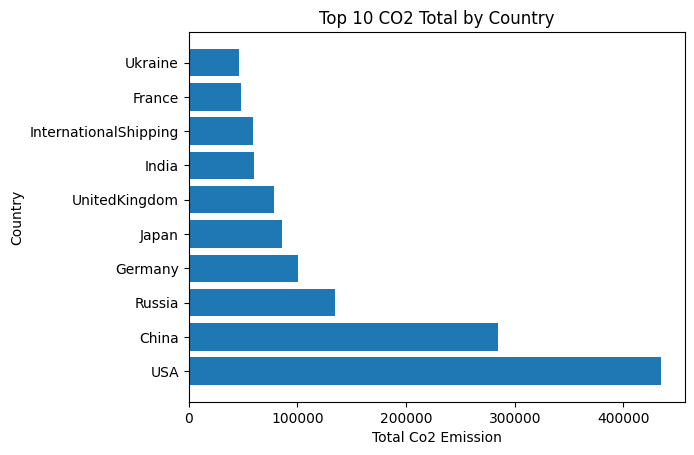

In [22]:
top_10 = Mean_dataset_without_global.groupby('Country')['Total Co2 Emission (Mt)'].sum().nlargest(10).reset_index()  # Add the total emission per country and select the ten highest values

plt.barh(y=top_10["Country"], width=top_10['Total Co2 Emission (Mt)'])
plt.xlabel('Total Co2 Emission')
plt.ylabel('Country')
plt.title('Top 10 CO2 Total by Country')

plt.show()


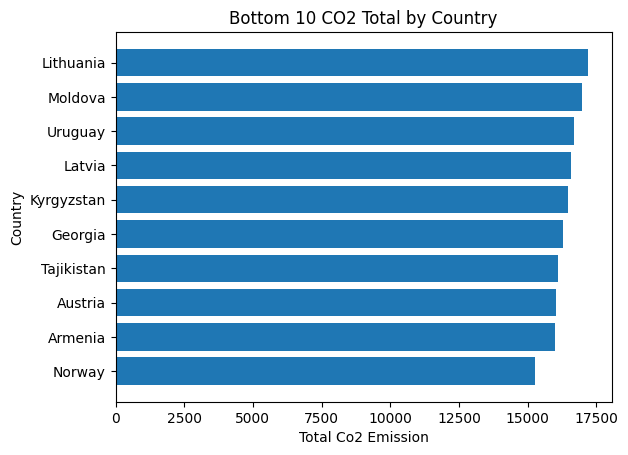

In [23]:
bottom_10 = Mean_dataset_without_global.groupby('Country')['Total Co2 Emission (Mt)'].sum().nsmallest(10).reset_index()  # Add the total emission per country and select the ten lowest values

plt.barh(y=bottom_10["Country"], width=bottom_10['Total Co2 Emission (Mt)'])
plt.xlabel('Total Co2 Emission')
plt.ylabel('Country')
plt.title('Bottom 10 CO2 Total by Country')

plt.show()
